# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler , Normalizer
from scipy import stats
from sklearn import metrics
from pathlib import Path
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

In [4]:
import matplotlib as mpl
import seaborn as sns
sns.set(style="whitegrid")
import plotly.graph_objects as ply
import plotly.express as px
from sklearn.datasets import load_digits
%config InlineBackend.figure_format = 'retina'

## Data Pre-Processing

In [5]:
# Read csv file Cardio 
df = pd.read_csv("cardio.csv",";")

In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df.shape

(70000, 13)

### Statistic Description

In [8]:
# Statistic description for numeric columns
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### Standard deviations show all the variables contain some information.

In [9]:
list(df)

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [10]:
# Check null values
display("NULL Values", df.isnull().sum())

'NULL Values'

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

#### No null values.

In [11]:
df.drop("id", axis=1,inplace=True)

In [12]:
# Checking for duplicates
df.duplicated().sum()

24

#### There are 24 duplicate values.

In [13]:
# Drop duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#### There are now 0 duplicate values.

### Renaming Columns

In [14]:
df = df.rename(columns = {"ap_hi":"systolic BP", "ap_lo":"diastolic BP"})
df.head()                 

,age,gender,height,weight,systolic BP,diastolic BP,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Correlation Matrix

In [15]:
# Generate correlation matrix
df.corr()

,age,gender,height,weight,systolic BP,diastolic BP,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022763,-0.081546,0.053697,0.020765,0.017647,0.154432,0.098704,-0.047650,-0.029735,-0.009918,0.238189
gender,-0.022763,1.000000,0.499080,0.155320,0.005996,0.015241,-0.035915,-0.020558,0.338131,0.170950,0.005917,0.008037
height,-0.081546,0.499080,1.000000,0.290983,0.005488,0.006151,-0.050225,-0.018592,0.188003,0.094425,-0.006569,-0.010871
weight,0.053697,0.155320,0.290983,1.000000,0.030693,0.043695,0.141679,0.106790,0.067725,0.067071,-0.016863,0.181599
systolic BP,0.020765,0.005996,0.005488,0.030693,1.000000,0.016084,0.023768,0.011833,-0.000928,0.001403,-0.000031,0.054475
diastolic BP,0.017647,0.015241,0.006151,0.043695,0.016084,1.000000,0.024004,0.010794,0.005177,0.010594,0.004784,0.065717
cholesterol,0.154432,-0.035915,-0.050225,0.141679,0.023768,0.024004,1.000000,0.451539,0.010298,0.035718,0.009927,0.221119
gluc,0.098704,-0.020558,-0.018592,0.106790,0.011833,0.010794,0.451539,1.000000,-0.004799,0.011214,-0.006761,0.089268
smoke,-0.047650,0.338131,0.188003,0.067725,-0.000928,0.005177,0.010298,-0.004799,1.000000,0.340077,0.025870,-0.015533
alco,-0.029735,0.170950,0.094425,0.067071,0.001403,0.010594,0.035718,0.011214,0.340077,1.000000,0.025486,-0.007366


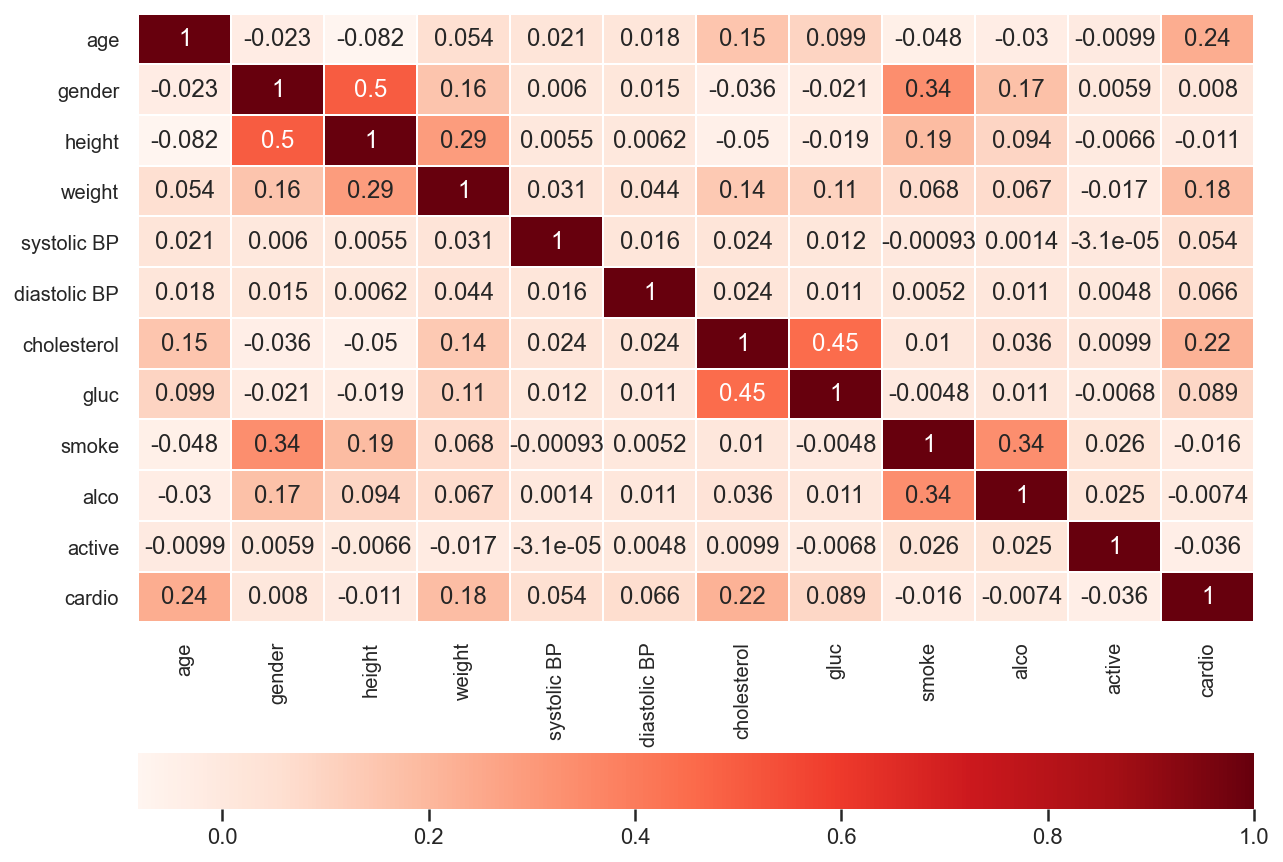

In [16]:
# Plot correlation matrix
mpl.rcParams["figure.figsize"] = 10, 8
res = sns.heatmap(df.corr(), annot = True, linewidth=.5, cmap="Reds",annot_kws={"size":12}, cbar_kws={"orientation": "horizontal"})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 10)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 10)
plt.savefig("Corr_Matrix_Heat_Map.png")

### Histogram of Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfe6263fd0>,
      dtype=object)

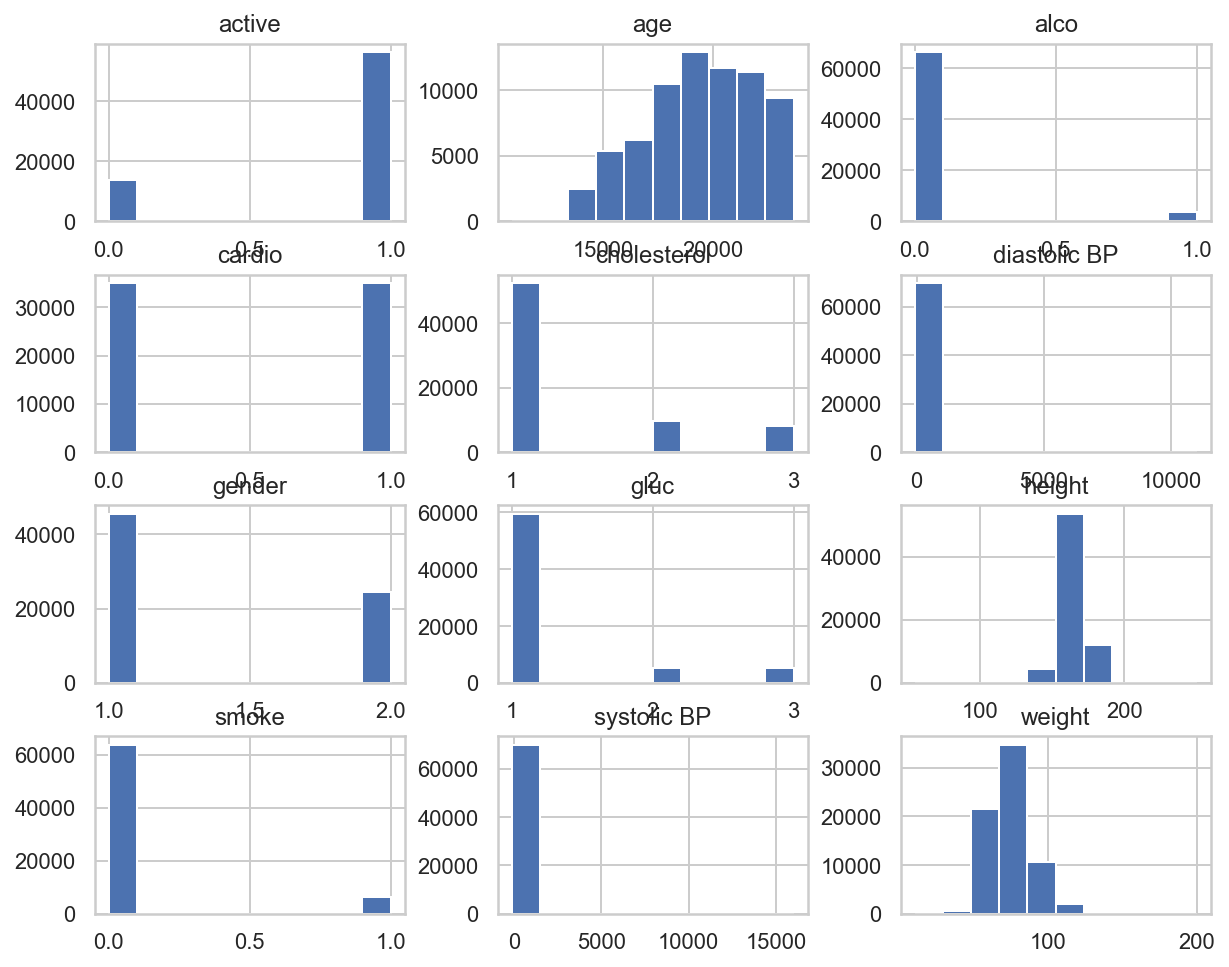

In [17]:
df.hist()

## Exploratory data analysis (EDA)

In [18]:
# Cardio 
df = pd.read_csv("cardio.csv",";")

In [19]:
# Renaming columns
df = df.rename(columns = {"ap_hi":"systolic BP", "ap_lo":"diastolic BP"})

In [20]:
# Age column days to age
df["age"] = df["age"].div(365).apply(int)

In [21]:
# Turning int values to categorial values in the df
df_cat = df.copy().drop("id", axis=1)
df_cat["cardio"] = df_cat["cardio"].replace({0:"Absence of CVD", 1:"Presence of CVD"})
df_cat["cholesterol"] = df_cat["cholesterol"].replace({1:"Normal", 2:"Above Normal", 3:"Well Above Normal"})
df_cat["gluc"] = df_cat["gluc"].replace({1:"Normal", 2:"Above Normal", 3:"Well Above Normal"})
df_cat["smoke"] = df_cat["smoke"].replace({0: "Does Not Smoke", 1: "Smokes"})
df_cat["alco"] = df_cat["alco"].replace({0:"Does Not Drink Alcohol", 1:"Drinks"})
df_cat["active"] = df_cat["active"].replace({0:"Does Not Exercise", 1: "Exercises"})
df_cat["gender"] = df_cat["gender"].replace({1:"female", 2:"male"})

df_cat.head()

,age,gender,height,weight,systolic BP,diastolic BP,cholesterol,gluc,smoke,alco,active,cardio
0,50,male,168,62.0,110,80,Normal,Normal,Does Not Smoke,Does Not Drink Alcohol,Exercises,Absence of CVD
1,55,female,156,85.0,140,90,Well Above Normal,Normal,Does Not Smoke,Does Not Drink Alcohol,Exercises,Presence of CVD
2,51,female,165,64.0,130,70,Well Above Normal,Normal,Does Not Smoke,Does Not Drink Alcohol,Does Not Exercise,Presence of CVD
3,48,male,169,82.0,150,100,Normal,Normal,Does Not Smoke,Does Not Drink Alcohol,Exercises,Presence of CVD
4,47,female,156,56.0,100,60,Normal,Normal,Does Not Smoke,Does Not Drink Alcohol,Does Not Exercise,Absence of CVD


In [ ]:
# Function to combine weight and height to get BMI
df_cat["BMI_int"] = df_cat["weight"]/((df_cat["height"]/100)**2)
def bmi_cat(bmi_score):
    if bmi_score < 18.5:
        return "Underweight"
    elif 18.5 <= bmi_score <= 25:
        return "Normal"
    else:
        return "Abnormal"

df_cat["BMI"] = df_cat["BMI_int"].apply(lambda x: bmi_cat(x))

# According to
# https://www.webmd.com/hypertension-high-blood-pressure/guide/diastolic-and-systolic-blood-pressure-know-your-numbers#1
# Function to categorize blood pressure
# Remove outliers
outliers = ((df_cat["systolic BP"] > 250) | (df_cat["systolic BP"] > 250) | (df_cat["diastolic BP"] > 200) )
df_cat = df_cat[~outliers]
print("There are {} outliers".format(df_cat[outliers]["cardio"].count()))

def cat_blood_pressure(row):
    high = row["systolic BP"]
    low = row["diastolic BP"]
    if (high < 120) and (low < 80):
        return "Normal"
    elif 120 <= high <= 129 and low < 80:
        return "Elevated"
    elif 130 <= high <= 139 or 80 <= low <= 89:
        return "Hyertension (Stage 1)"
    elif  140 <= high <= 180 or 90 <= low <= 120:
        return "Hypertension (Stage 2)"
    else:
        return "Hypertensive Crisis"

df_cat["blood pressure"] = df_cat.apply(cat_blood_pressure, axis=1)

df_cat.head()

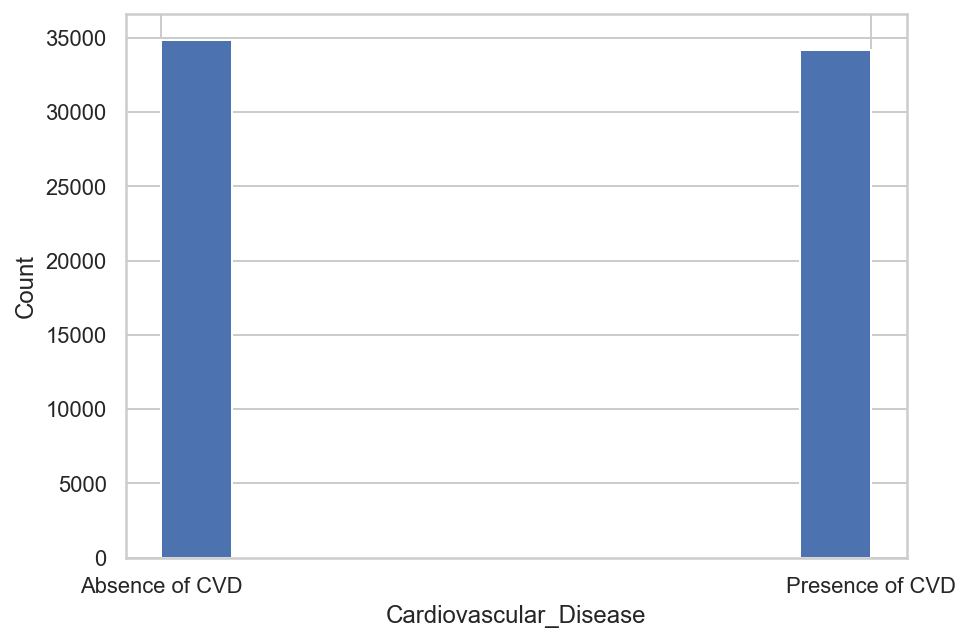

In [23]:
#Cardiovascular_Disease  histogram
plt.figure(figsize=(7,5))
plt.hist(df_cat['cardio'])
plt.xlabel('Cardiovascular_Disease')
plt.ylabel('Count')
plt.xticks([0,1])
plt.show()

### Age Distribution

Text(0.5, 1.0, 'Distribution of Ages')

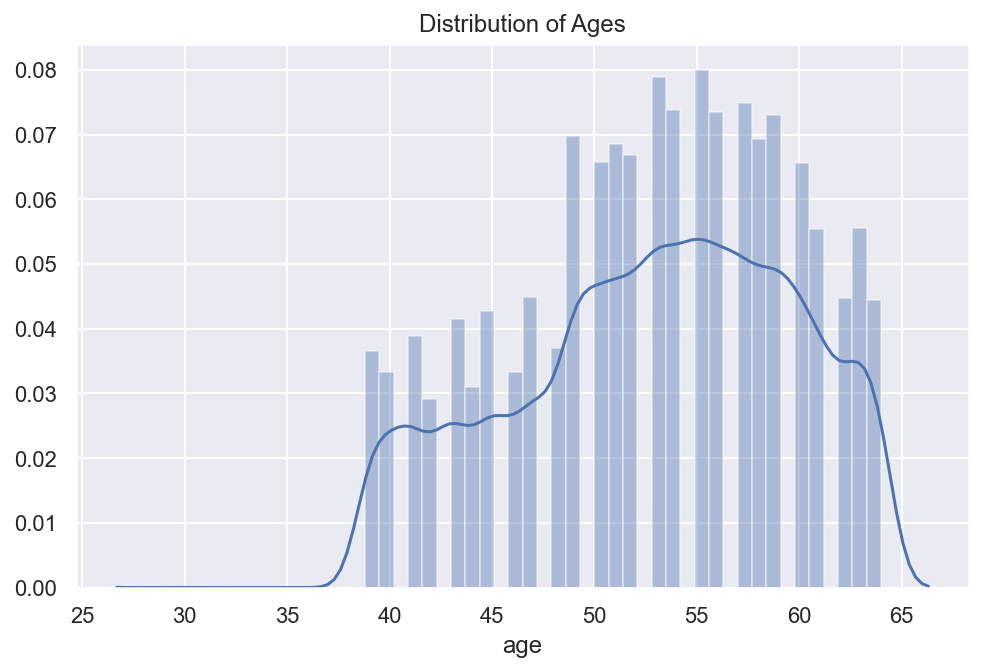

In [24]:
# Distribution of age, with an overlay of a density plot
sns.set(rc={'figure.figsize':(8,5)})
age_dist = sns.distplot(df_cat['age'])
age_dist.set_title("Distribution of Ages")

Text(0.5, 1.0, 'Appearance of Cardiovascular Disease (CVD) Across Ages')

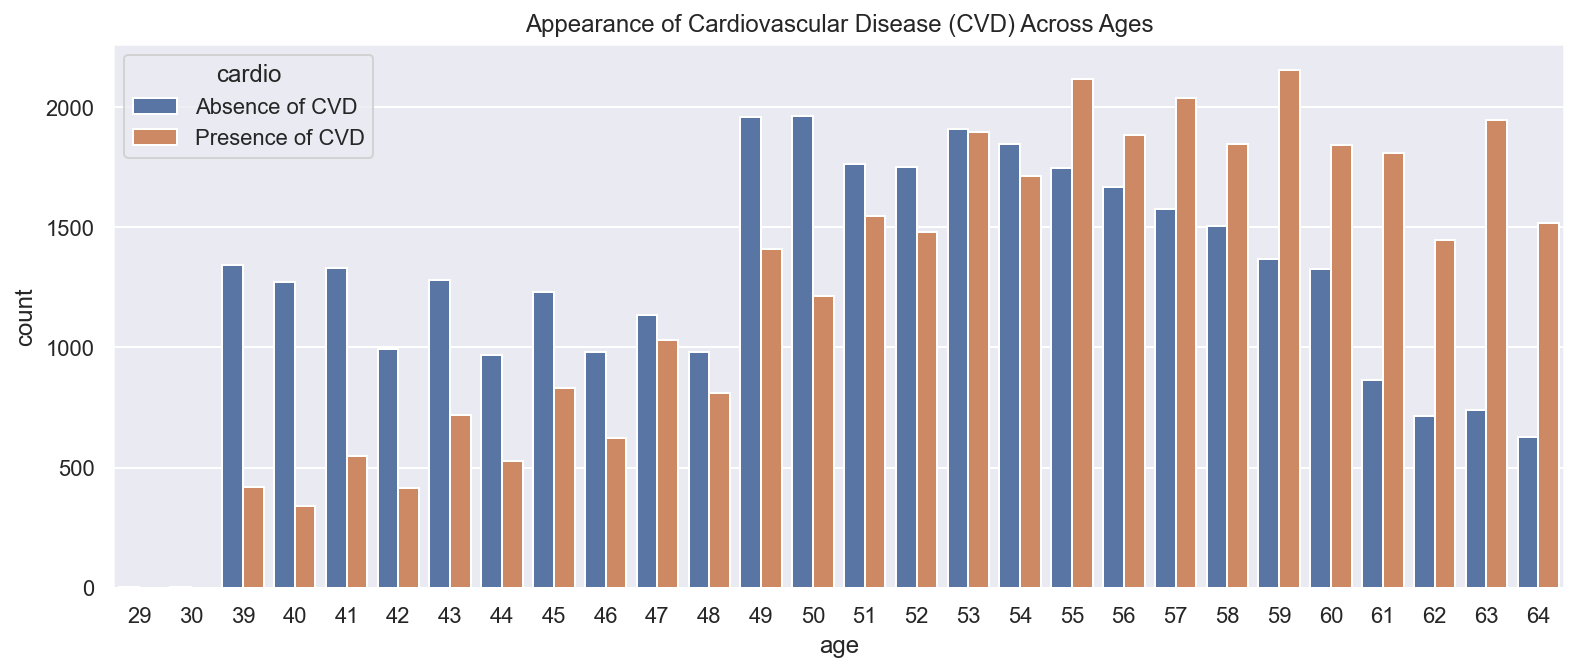

In [25]:
# Cardiovascular Disease across age
mpl.rcParams['figure.figsize'] = 13, 5
sns.countplot(x="age", hue="cardio", data=df_cat).set_title("Appearance of Cardiovascular Disease (CVD) Across Ages")

### Height Distribution

Text(0.5, 1.0, 'Distribution of Height')

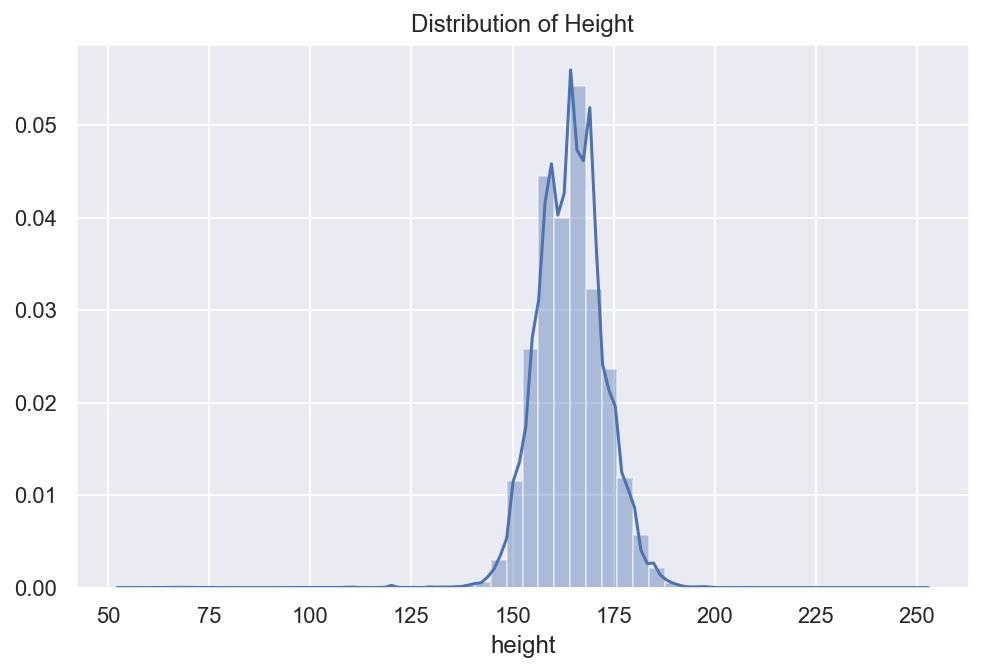

In [26]:
# Distribution of height, with an overlay of a density plot
sns.set(rc={'figure.figsize':(8,5)})
age_dist = sns.distplot(df_cat['height'])
age_dist.set_title("Distribution of Height")

### Weight Distribution

Text(0.5, 1.0, 'Distribution of Weight')

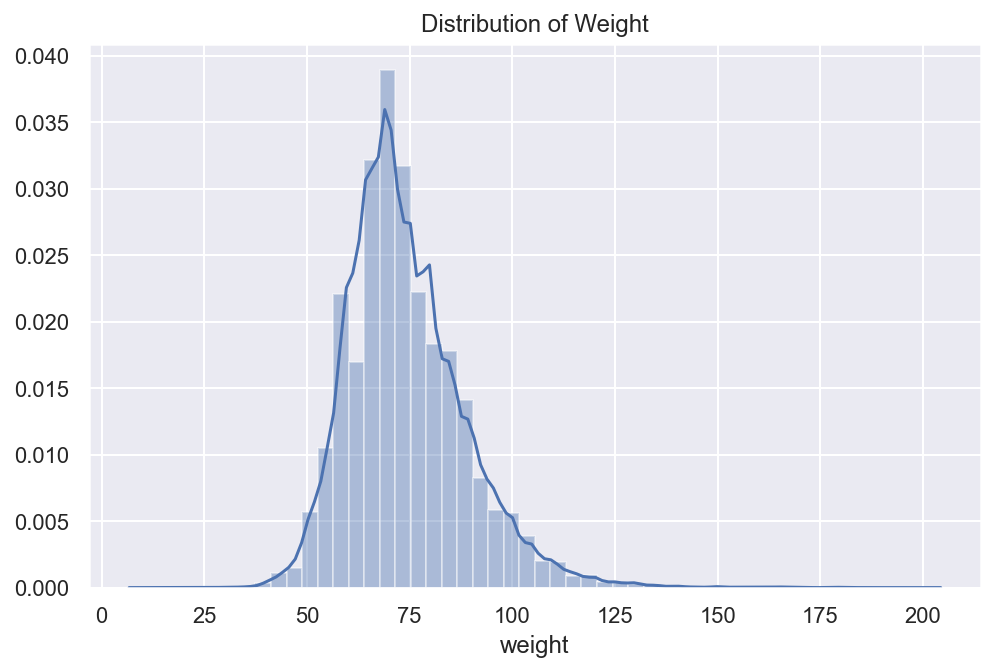

In [27]:
# Distribution of weitht, with an overlay of a density plot
sns.set(rc={'figure.figsize':(8,5)})
age_dist = sns.distplot(df_cat['weight'])
age_dist.set_title("Distribution of Weight")

### Gender and Cardiovascular Disease

In [28]:
# Cardiovascular_Disease by gender
df_cat.groupby('gender')['gender'].count()

gender
female    44942
male      24065
Name: gender, dtype: int64

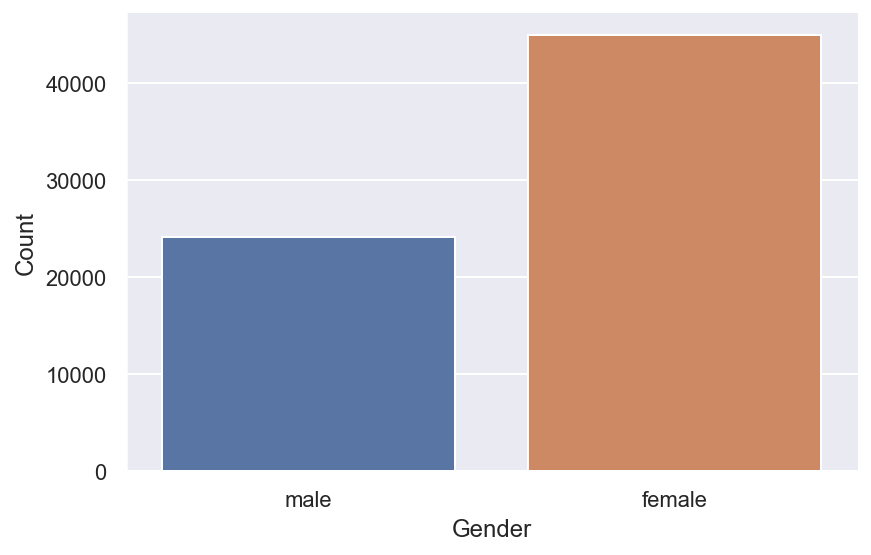

In [29]:
# Use seaborn to plot males and females count: male=1, female=2
fig = sns.catplot('gender', data=df_cat, height=4,kind='count',aspect=1.5)
fig.set_axis_labels("Gender","Count")

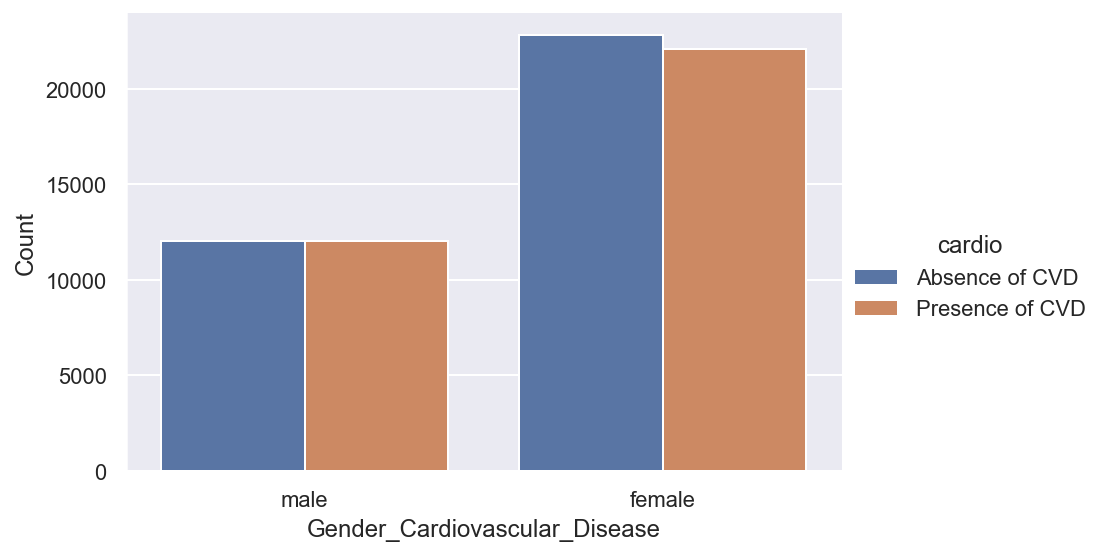

In [30]:
# Use seaborn to plot males and females Cardiovascular_Disease
fig = sns.catplot('gender', data=df_cat, hue='cardio',height=4,kind='count',aspect=1.5)
fig.set_axis_labels("Gender_Cardiovascular_Disease","Count")
fig.savefig("Gender_Cardiovascular_Disease.png")

### BMI (Height and Weight) Cardiovascular Disease

Text(0.5, 1.0, 'Appearance of Cardiovascular Disease (CVD) Across BMI')

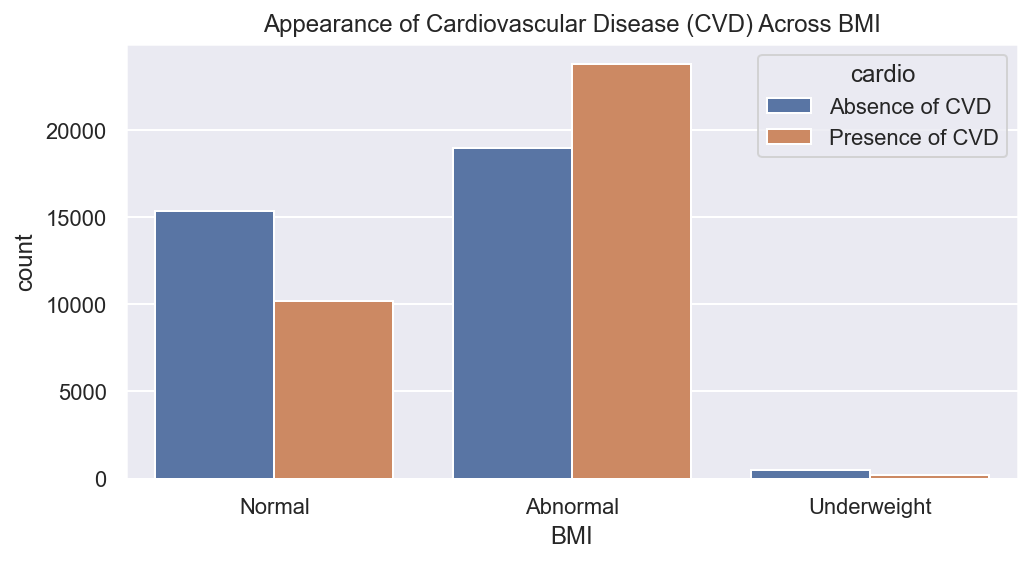

In [31]:
mpl.rcParams['figure.figsize'] = 8, 4
sns.countplot(x="BMI", hue="cardio", data=df_cat).set_title("Appearance of Cardiovascular Disease (CVD) Across BMI")

###  Cholesterol Cardiovascular Disease

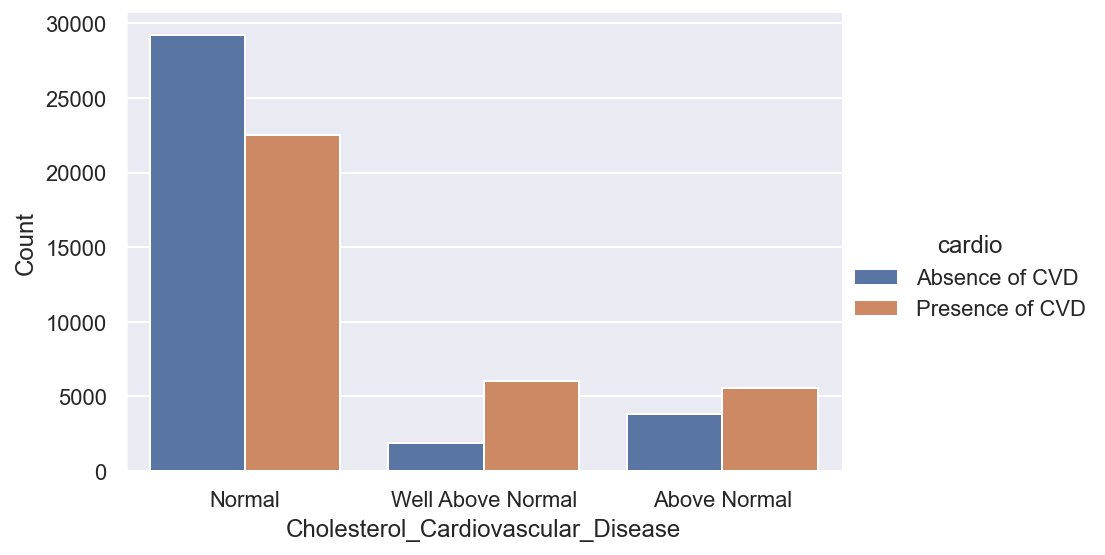

In [32]:
fig = sns.catplot('cholesterol', data=df_cat, hue='cardio',height=4,kind='count',aspect=1.5)
fig.set_axis_labels("Cholesterol_Cardiovascular_Disease","Count")
fig.savefig("Cholesterol_Cardiovascular_Disease.png")

### Blood Pressure and Cardiovascular Disease

Text(0.5, 1.0, 'Appearance of Cardiovascular Disease (CVD) Across Blood Pressure Levels')

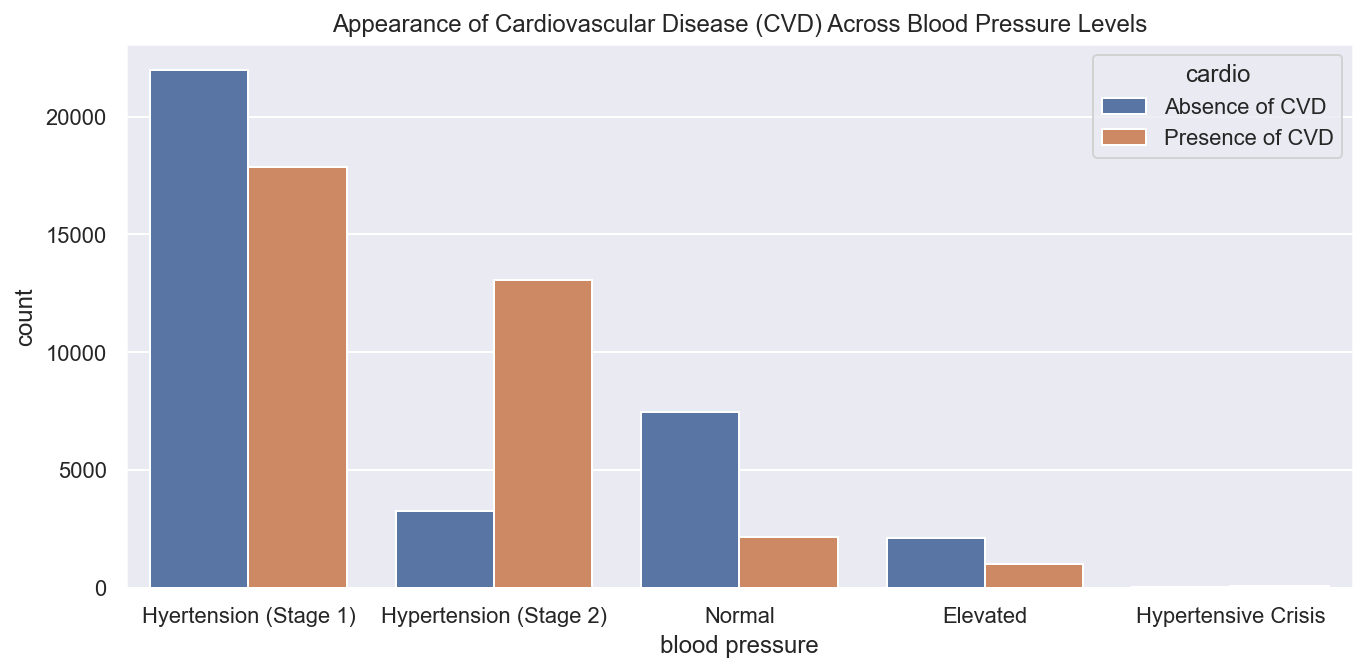

In [33]:
mpl.rcParams['figure.figsize'] = 11, 5
sns.countplot(x="blood pressure",hue="cardio", data = df_cat).set_title("Appearance of Cardiovascular Disease (CVD) Across Blood Pressure Levels")

### Gluc and Cardiovascular Disease

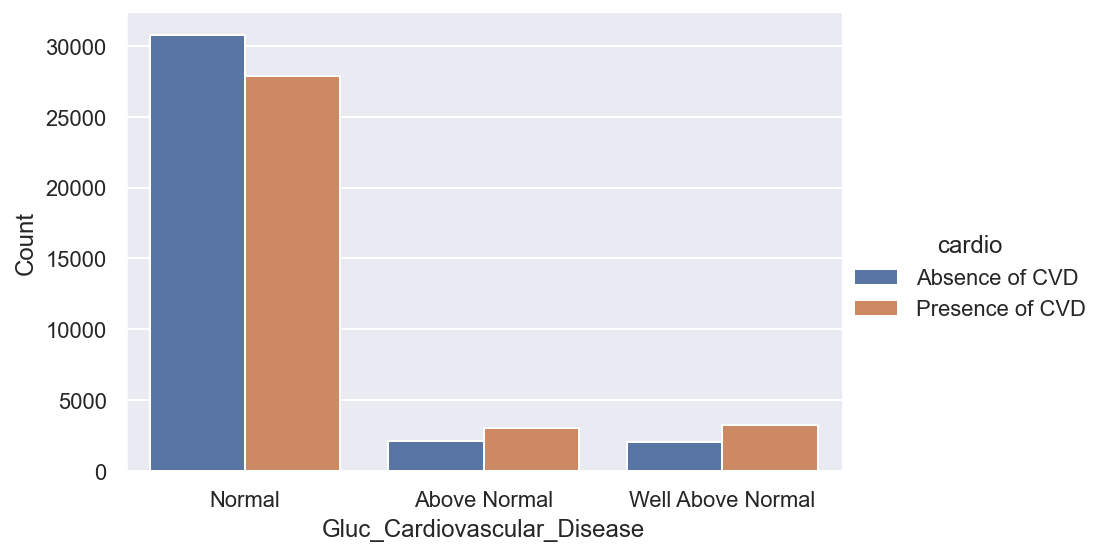

In [34]:
fig = sns.catplot('gluc', data=df_cat, hue='cardio',height=4,kind='count',aspect=1.5)
fig.set_axis_labels("Gluc_Cardiovascular_Disease","Count")

### Smoke and Cardiovascular Disease

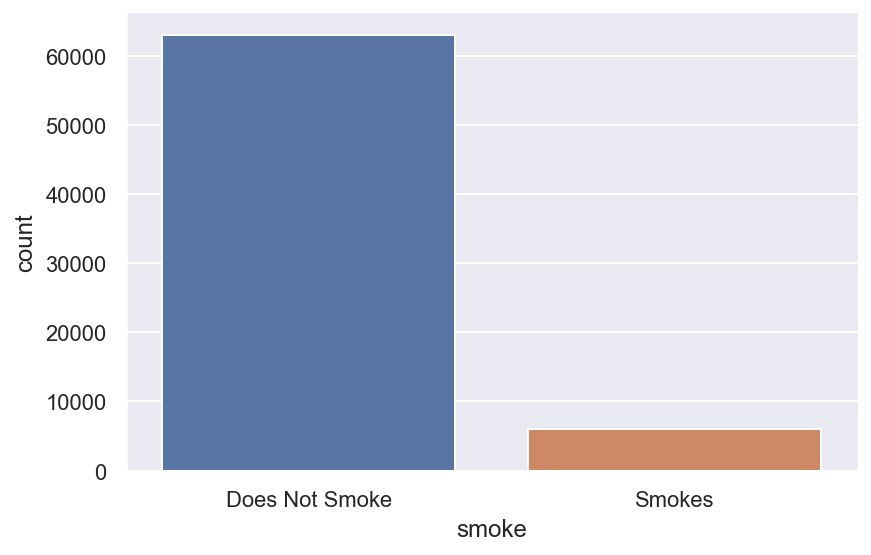

In [35]:
# Use seaborn to plot smoke or not count: smoke=1, not smoke=0
sns.catplot('smoke', data=df_cat,kind='count', height=4, aspect=1.5)

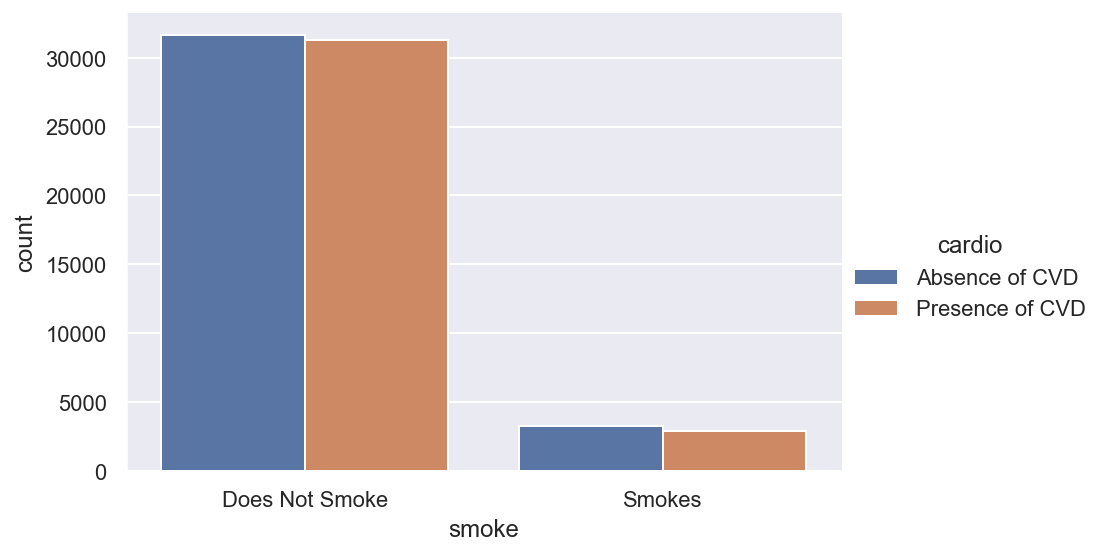

In [36]:
# Use seaborn to plot smoke and cardio
sns.catplot('smoke', data=df_cat,hue='cardio', kind='count', height=4, aspect=1.5)
fig.set_axis_labels("Smoke_Cardiovascular_Disease","Count")

### Alcohol and Cardiovascular Disease

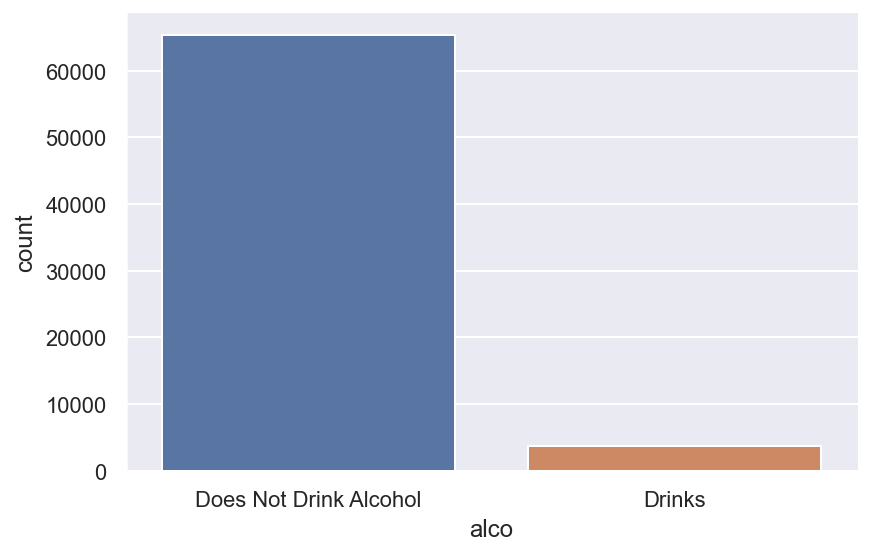

In [37]:
# Use seaborn to plot smoke or not count: smoke=1, not smoke=0
sns.catplot('alco', data=df_cat,kind='count', height=4, aspect=1.5)

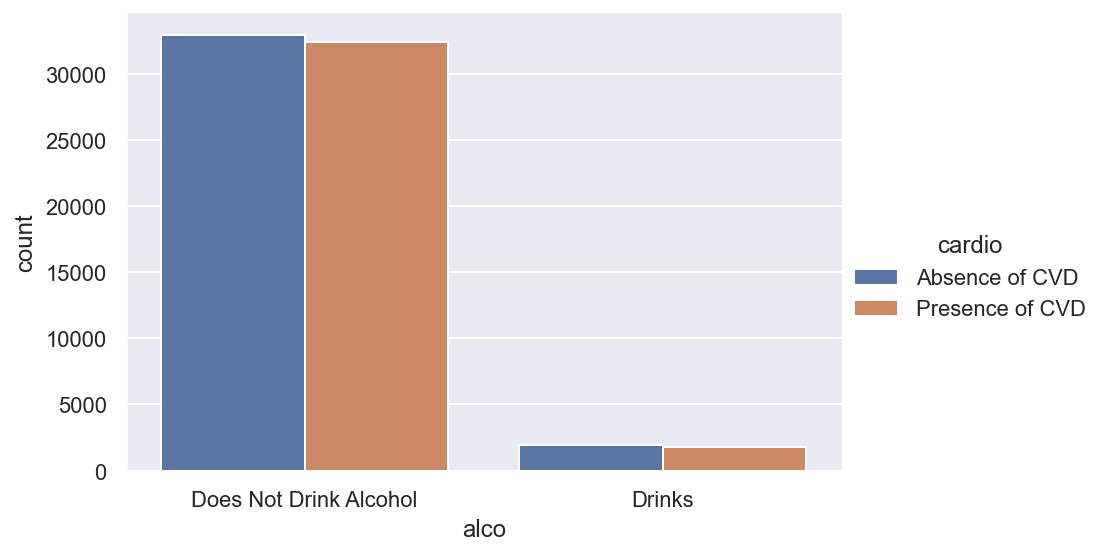

In [38]:
# Use seaborn to plot alchohol and cardio
sns.catplot('alco', data=df_cat,hue='cardio', kind='count', height=4, aspect=1.5)
fig.set_axis_labels("Alco_Cardiovascular_Disease","Count")

### Active or Not and Cardiovascular Disease

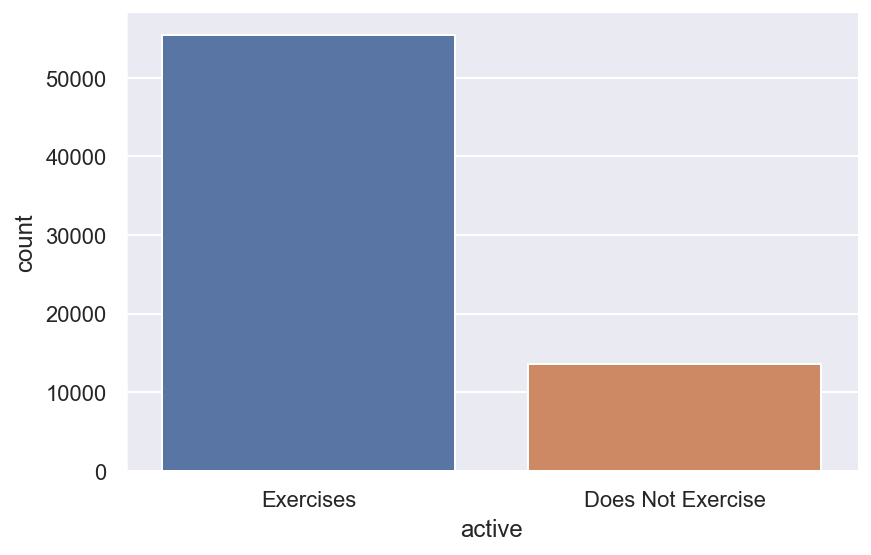

In [39]:
# Use seaborn to plot smoke or not count: active=1, not active=0
sns.catplot('active', data=df_cat,kind='count', height=4, aspect=1.5)

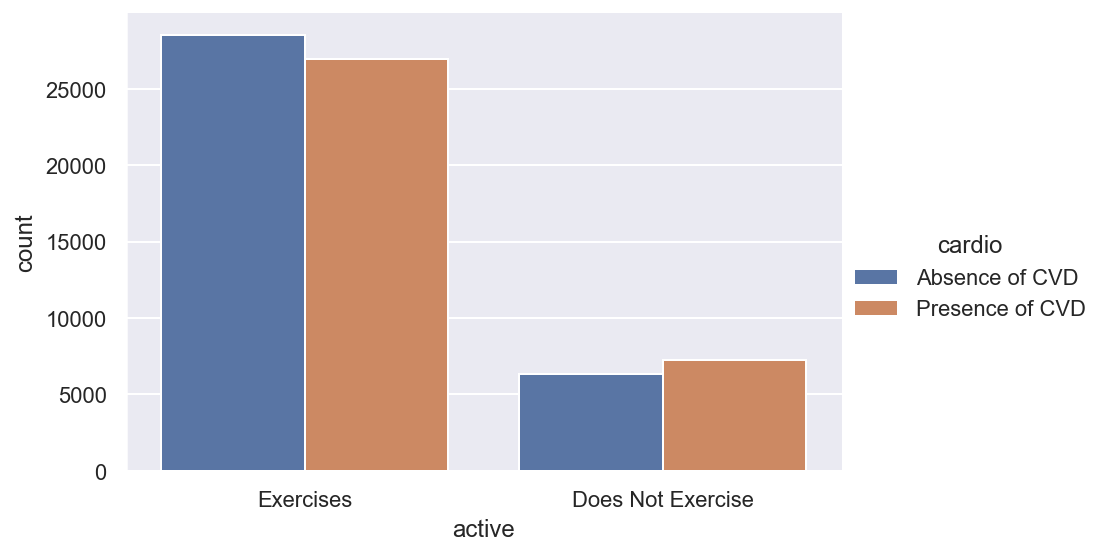

In [40]:
# Use seaborn to plot active and cardio
sns.catplot('active', data=df_cat,hue='cardio', kind='count', height=4, aspect=1.5)
fig.set_axis_labels("Active_Cardiovascular_Disease","Count")

# Feature Selection

In [41]:
# Drop id column
df= df.drop("id",axis=1)
df

,age,gender,height,weight,systolic BP,diastolic BP,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [42]:
# Generate correlation matrix
df.corr()

,age,gender,height,weight,systolic BP,diastolic BP,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
systolic BP,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
diastolic BP,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098388,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029756,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


In [43]:
# Generate covariance matrix
# df.cov()

## Feature Engineering

### Use Recursive Feature Elimination to help select features.

In [44]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [45]:
from sklearn.feature_selection import RFE

In [46]:
# Generate X and y variables
y = df[["cardio"]]
X = df.drop(["cardio"],axis=1)

In [47]:
X

,age,gender,height,weight,systolic BP,diastolic BP,cholesterol,gluc,smoke,alco,active
0,50,2,168,62.0,110,80,1,1,0,0,1
1,55,1,156,85.0,140,90,3,1,0,0,1
2,51,1,165,64.0,130,70,3,1,0,0,0
3,48,2,169,82.0,150,100,1,1,0,0,1
4,47,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1
69996,61,1,158,126.0,140,90,2,2,0,0,1
69997,52,2,183,105.0,180,90,3,1,0,1,0
69998,61,1,163,72.0,135,80,1,2,0,0,0


In [48]:
# Create the RFE using random forest
rf = RandomForestClassifier()

In [49]:
rf

RandomForestClassifier()

In [50]:
rfe = RFE(estimator=rf,n_features_to_select=6,step=1)
selector = rfe.fit(X, y)

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/feature_selection/_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/feature_selection/_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/feature_selection/_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/feature_selection/_rfe.py:196: DataConver

In [51]:
# Variables chosen by feature engineering
selector.support_

array([ True, False,  True,  True,  True,  True,  True, False, False,
       False, False])

In [52]:
# Variable importance ranking
selector.ranking_

array([1, 3, 1, 1, 1, 1, 1, 2, 5, 6, 4])

## Selected Features: age, height, weight, ap_hi, ap_lo, cholesterol

In [53]:
# Report selected features by feature engineering
print("Optimal number of features : %d" % rfe.n_features_)

Optimal number of features : 6


In [54]:
# Drop unimportant variables
df = df.drop(['gender','gluc','smoke','alco','active'],axis=1)
df

,age,height,weight,systolic BP,diastolic BP,cholesterol,cardio
0,50,168,62.0,110,80,1,0
1,55,156,85.0,140,90,3,1
2,51,165,64.0,130,70,3,1
3,48,169,82.0,150,100,1,1
4,47,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...
69995,52,168,76.0,120,80,1,0
69996,61,158,126.0,140,90,2,1
69997,52,183,105.0,180,90,3,1
69998,61,163,72.0,135,80,1,1


In [55]:
# Generate X and y variables for reduced feature dataset
y = df[["cardio"]]
X = df.drop(["cardio"],axis=1)

In [56]:
X

,age,height,weight,systolic BP,diastolic BP,cholesterol
0,50,168,62.0,110,80,1
1,55,156,85.0,140,90,3
2,51,165,64.0,130,70,3
3,48,169,82.0,150,100,1
4,47,156,56.0,100,60,1
...,...,...,...,...,...,...
69995,52,168,76.0,120,80,1
69996,61,158,126.0,140,90,2
69997,52,183,105.0,180,90,3
69998,61,163,72.0,135,80,1


## Split data into train and test sets. Scale the data.

In [57]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [58]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train Machine Learning Models

## Decision Tree Model

### Tune Parameters

In [59]:
# Tune Parameters for Decision Tree Model
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
# grid search
max_features = [2,3,5]
max_depth = [3,5,10]
model = tree.DecisionTreeClassifier(max_features=max_features,
                                    random_state=42)
param_grid = dict(max_features=max_features,max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_scaled, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.552197 using {'max_depth': 5, 'max_features': 5}
-0.560843 (0.003967) with: {'max_depth': 3, 'max_features': 2}
-0.562483 (0.003899) with: {'max_depth': 3, 'max_features': 3}
-0.558305 (0.003808) with: {'max_depth': 3, 'max_features': 5}
-0.558016 (0.006697) with: {'max_depth': 5, 'max_features': 2}
-0.555849 (0.005596) with: {'max_depth': 5, 'max_features': 3}
-0.552197 (0.006920) with: {'max_depth': 5, 'max_features': 5}
-0.805206 (0.033048) with: {'max_depth': 10, 'max_features': 2}
-0.854740 (0.043877) with: {'max_depth': 10, 'max_features': 3}
-0.903429 (0.054015) with: {'max_depth': 10, 'max_features': 5}


### Train Decision Tree

In [60]:
#Train a Decision Tree Model
DT = tree.DecisionTreeClassifier(max_depth=5,
                                 max_features= 5,
                                 random_state=42)
DT_model = DT.fit(X_train_scaled, y_train)

In [61]:
print("Accuracy (training): {0:.3f}".format(
        DT.score(
            X_train_scaled,
            y_train)))
print("Accuracy (testing): {0:.3f}".format(
        DT.score(
            X_test_scaled,
            y_test)))

Accuracy (training): 0.733
Accuracy (testing): 0.732


## Random Forest Model

### Tune Parameters

In [62]:
# grid search
model = RandomForestClassifier(random_state=42)
max_depth = [5,8,10]
n_estimators = [80, 100, 200]
param_grid = dict(n_estimators=n_estimators,max_depth=max_depth)
# param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_scaled, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best: -0.543811 using {'max_depth': 10, 'n_estimators': 200}
-0.549438 (0.003911) with: {'max_depth': 5, 'n_estimators': 80}
-0.549683 (0.003903) with: {'max_depth': 5, 'n_estimators': 100}
-0.550130 (0.003931) with: {'max_depth': 5, 'n_estimators': 200}
-0.543976 (0.004124) with: {'max_depth': 8, 'n_estimators': 80}
-0.544103 (0.004126) with: {'max_depth': 8, 'n_estimators': 100}
-0.544156 (0.004079) with: {'max_depth': 8, 'n_estimators': 200}
-0.544155 (0.003976) with: {'max_depth': 10, 'n_estimators': 80}
-0.544012 (0.003962) with: {'max_depth': 10, 'n_estimators': 100}
-0.543811 (0.003801) with: {'max_depth': 10, 'n_estimators': 200}


### Train Random Forest

In [63]:
# Train a Random Forest Model
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            random_state=42)
rf_model = rf.fit(X_train_scaled, y_train)

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


### Accuracy

In [64]:
print("Accuracy (training): {0:.3f}".format(
        rf.score(
            X_train_scaled,
            y_train)))
print("Accuracy (testing): {0:.3f}".format(
        rf.score(
            X_test_scaled,
            y_test)))

Accuracy (training): 0.752
Accuracy (testing): 0.733


In [65]:
# Evaluate Random Forest Model using crossvalidation
from sklearn.model_selection import cross_val_score
rf_cv = RandomForestClassifier(n_estimators=100,
                               max_depth=8,
                               random_state=42)
scores = cross_val_score(rf_cv, X_train_scaled, y_train, cv=5)

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-pack

In [66]:
# Crossvalidation Scoores
scores

array([0.73171429, 0.73695238, 0.73266667, 0.73219048, 0.73295238])

In [67]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.73 (+/- 0.00)


In [68]:
# Plot one tree in Random Forest
fn=X.columns.tolist()
cn=y.columns.tolist()

In [69]:
fn

['age', 'height', 'weight', 'systolic BP', 'diastolic BP', 'cholesterol']

In [70]:
cn

['cardio']

In [71]:
print(len(rf.estimators_))

200


In [72]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=10, max_features='auto',
                       random_state=1608637542)

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(DT.estimators_[0],
               feature_names = fn, 
               class_names = cn,
               filled = True);
fig.savefig('Decision_Tree.png')

In [ ]:
# save the model to disk
import pickle
from pickle import dump
# save the model
dump(rf, open('model.pkl', 'wb'))

In [ ]:
# save the scaler
from pickle import dump
dump(scaler, open('scaler.pkl', 'wb'))

## Logistic Regression

In [74]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


 Logistic regression model accuracy: 0.720


## Gradient Boosting Tree Model

### Tune GradientBoostingClassifier Parameters

In [75]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
# grid search
max_depth = [5,8]
learning_rate = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2]
model = GradientBoostingClassifier(n_estimators=80,
                                   max_features=5,
                                   random_state=42)
param_grid = dict(learning_rate=learning_rate,max_depth=max_depth)
# param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_scaled, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best: -0.543010 using {'learning_rate': 0.1, 'max_depth': 5}
-0.691025 (0.000022) with: {'learning_rate': 0.0001, 'max_depth': 5}
-0.690956 (0.000025) with: {'learning_rate': 0.0001, 'max_depth': 8}
-0.673495 (0.000213) with: {'learning_rate': 0.001, 'max_depth': 5}
-0.672878 (0.000240) with: {'learning_rate': 0.001, 'max_depth': 8}
-0.582159 (0.001756) with: {'learning_rate': 0.01, 'max_depth': 5}
-0.579974 (0.001718) with: {'learning_rate': 0.01, 'max_depth': 8}
-0.543019 (0.004275) with: {'learning_rate': 0.05, 'max_depth': 5}
-0.546364 (0.004105) with: {'learning_rate': 0.05, 'max_depth': 8}
-0.543010 (0.004345) with: {'learning_rate': 0.1, 'max_depth': 5}
-0.549895 (0.003664) with: {'learning_rate': 0.1, 'max_depth': 8}
-0.545226 (0.003949) with: {'learning_rate': 0.2, 'max_depth': 5}
-0.561503 (0.004764) with: {'learning_rate': 0.2, 'max_depth': 8}


In [76]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a classifier object
learning_rates = [0.01,0.05, 0.1]
for learning_rate in learning_rates:
    GB = GradientBoostingClassifier(n_estimators=80,
                                    learning_rate=learning_rate,
                                    max_features=5,
                                    max_depth=5,
                                    random_state=42)

    # Fit the model
    GB.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy (training): {0:.3f}".format(
        GB.score(
            X_train_scaled,
            y_train)))
    print("Accuracy (validation): {0:.3f}".format(
        GB.score(
            X_test_scaled,
            y_test)))
    print()

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Learning rate:  0.01
Accuracy (training): 0.734
Accuracy (validation): 0.732



/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Learning rate:  0.05
Accuracy (training): 0.739
Accuracy (validation): 0.734



/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Learning rate:  0.1
Accuracy (training): 0.743
Accuracy (validation): 0.733



### Train Gradient Boosting Model

In [77]:
GB = GradientBoostingClassifier(n_estimators=80,
                                learning_rate=0.05,
                                max_features=5,
                                max_depth=5,
                                random_state=42)
# Fit the model
GB.fit(X_train_scaled, y_train)
# Score the model
print("Accuracy (training): {0:.3f}".format(
    GB.score(
        X_train_scaled,
        y_train)))
print("Accuracy (validation): {0:.3f}".format(
    GB.score(
        X_test_scaled,
        y_test)))
print()

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy (training): 0.739
Accuracy (validation): 0.734



## Confusion Matrix for Gradient Boosting Tree

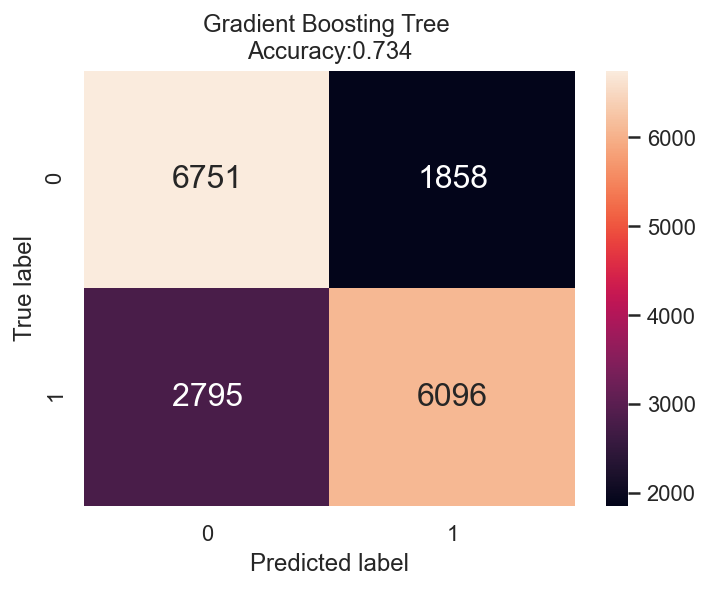

In [78]:
y_pred = GB.predict(X_test_scaled)
cm =metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True,annot_kws={'size':16}, fmt='g')
plt.title('Gradient Boosting Tree \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## KNN

In [79]:
# Trani a KNN Model
from sklearn import neighbors

### Tune n_neighbors

In [80]:
# grid search
n_neighbors = [10,50,100,200]
model = neighbors.KNeighborsClassifier()
param_grid = dict(n_neighbors=n_neighbors)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_scaled, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best: -0.599994 using {'n_neighbors': 50}
-0.910707 (0.041584) with: {'n_neighbors': 10}
-0.599994 (0.006070) with: {'n_neighbors': 50}
-0.603281 (0.006239) with: {'n_neighbors': 100}
-0.608619 (0.006107) with: {'n_neighbors': 200}


### Train KNN

In [81]:
knn=neighbors.KNeighborsClassifier(n_neighbors=50)
knn_model = knn.fit(X_train_scaled, y_train)

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


### Accurracy

In [82]:
print("Accuracy (training): {0:.3f}".format(
        knn.score(
            X_train_scaled,
            y_train)))
print("Accuracy (testing): {0:.3f}".format(
        knn.score(
            X_test_scaled,
            y_test)))

Accuracy (training): 0.701
Accuracy (testing): 0.684


## SVM

### Tune Parameters

In [84]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

Cs = [0.1, 1]
param_grid = dict(C=Cs)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=kfold)
grid_result = grid_search.fit(X_train_scaled, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

Best: 0.727981 using {'C': 1}
0.712286 (0.001536) with: {'C': 0.1}
0.727981 (0.000654) with: {'C': 1}


### Train a SVM model

In [85]:
svmModel = svm.SVC(kernel='rbf',
                    C= 1)
svmModel_fit = svmModel.fit(X_train_scaled, y_train)

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [86]:
print("Accuracy (training): {0:.3f}".format(
        svmModel.score(
            X_train_scaled,
            y_train)))
print("Accuracy (testing): {0:.3f}".format(
        svmModel.score(
            X_test_scaled,
            y_test)))

Accuracy (training): 0.730
Accuracy (testing): 0.730


## Save Trained Model and Scaler

In [87]:
import pickle
from pickle import dump
# save the model
dump(GB, open('model.pkl', 'wb'))

In [88]:
# save the scaler
from pickle import dump
dump(scaler, open('scaler.pkl', 'wb'))

## Plot Training and Validation curves

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

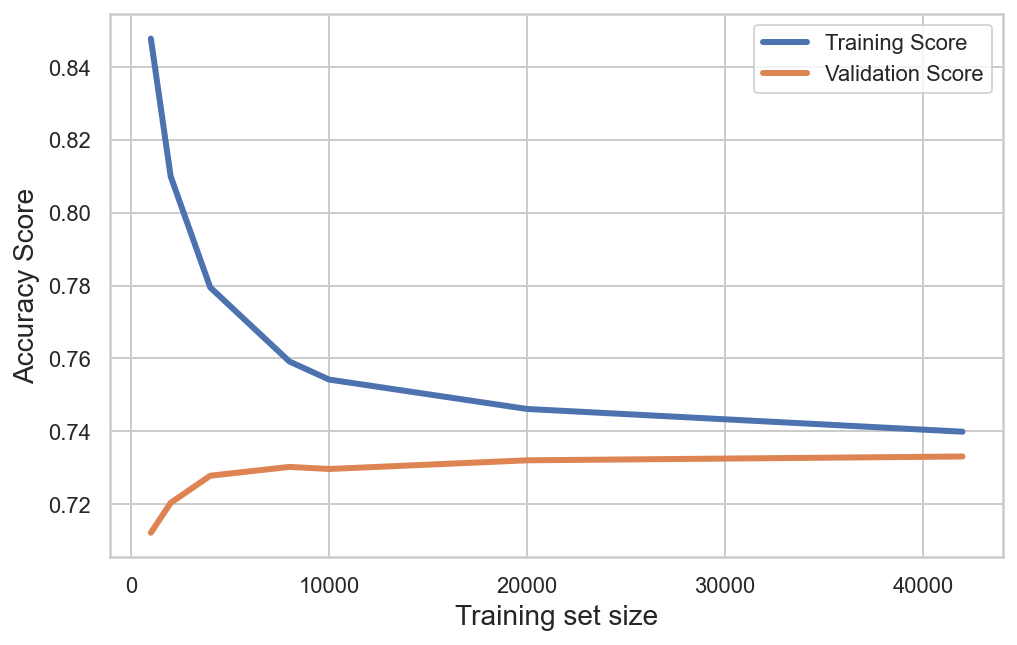

In [89]:
from sklearn.model_selection import learning_curve
train_sizes = [1000, 2000, 4000, 8000, 10000, 20000, 42000]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = GB,
X = X_train_scaled,
y = y_train, train_sizes=train_sizes, cv=5,
scoring ='accuracy', shuffle=True)

sns.set_style('whitegrid')
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores_mean, label = 'Training Score', lw=3)
plt.plot(train_sizes, validation_scores_mean, label = 'Validation Score', lw=3)
plt.ylabel('Accuracy Score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.legend()
plt.savefig("GradientBoosting Learning Curve.png")

## Plot learning_rate vs loss

In [90]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
# grid search
model = GradientBoostingClassifier(n_estimators=80,
                                   max_features=5,
                                   random_state=42)
max_depth = [5,10]
learning_rate = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2]
param_grid = dict(learning_rate=learning_rate,max_depth=max_depth)
# param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_scaled, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
# plt.errorbar(learning_rate, means, yerr=stds)
# plt.title("GradientBoostingClassifier learning_rate vs Log Loss")
# plt.xlabel('learning_rate')
# plt.ylabel('Log Loss')
# plt.savefig('learning_rate.png')

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best: -0.543010 using {'learning_rate': 0.1, 'max_depth': 5}
-0.691025 (0.000022) with: {'learning_rate': 0.0001, 'max_depth': 5}
-0.690944 (0.000022) with: {'learning_rate': 0.0001, 'max_depth': 10}
-0.673495 (0.000213) with: {'learning_rate': 0.001, 'max_depth': 5}
-0.672786 (0.000209) with: {'learning_rate': 0.001, 'max_depth': 10}
-0.582159 (0.001756) with: {'learning_rate': 0.01, 'max_depth': 5}
-0.580561 (0.001709) with: {'learning_rate': 0.01, 'max_depth': 10}
-0.543019 (0.004275) with: {'learning_rate': 0.05, 'max_depth': 5}
-0.553551 (0.003733) with: {'learning_rate': 0.05, 'max_depth': 10}
-0.543010 (0.004345) with: {'learning_rate': 0.1, 'max_depth': 5}
-0.563131 (0.004324) with: {'learning_rate': 0.1, 'max_depth': 10}
-0.545226 (0.003949) with: {'learning_rate': 0.2, 'max_depth': 5}
-0.593728 (0.006640) with: {'learning_rate': 0.2, 'max_depth': 10}


ValueError: shape mismatch: objects cannot be broadcast to a single shape

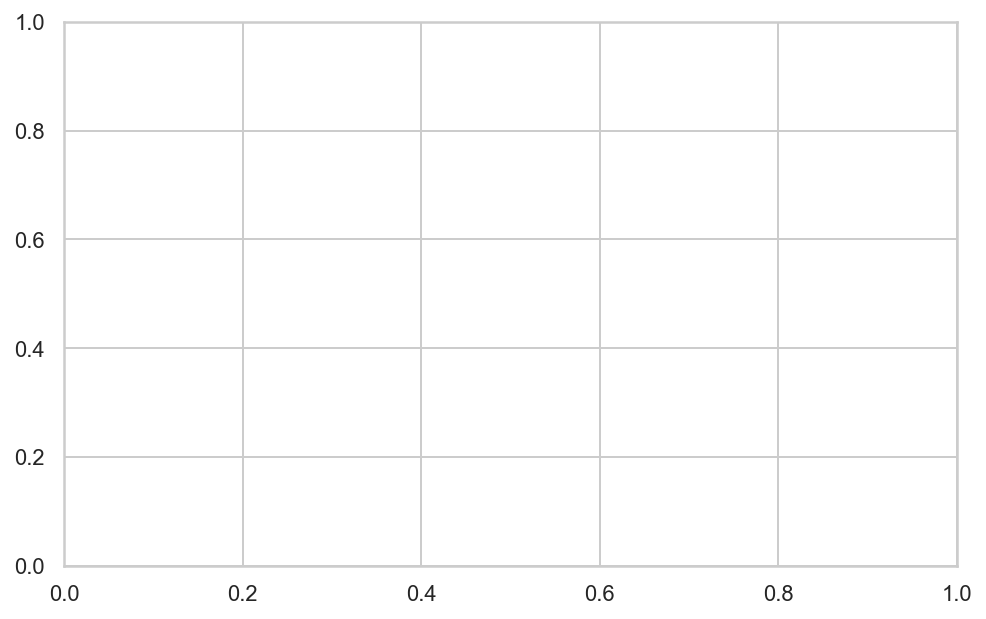

In [94]:
# plot
plt.figure(figsize=(8,5))
plt.errorbar(learning_rate, means, yerr=stds)
plt.title("GradientBoostingClassifier learning_rate vs Log Loss")
plt.xlabel('learning_rate')
plt.ylabel('Log Loss')
plt.savefig('learning_rate.png')

## Plot learning_rate vs max_depth

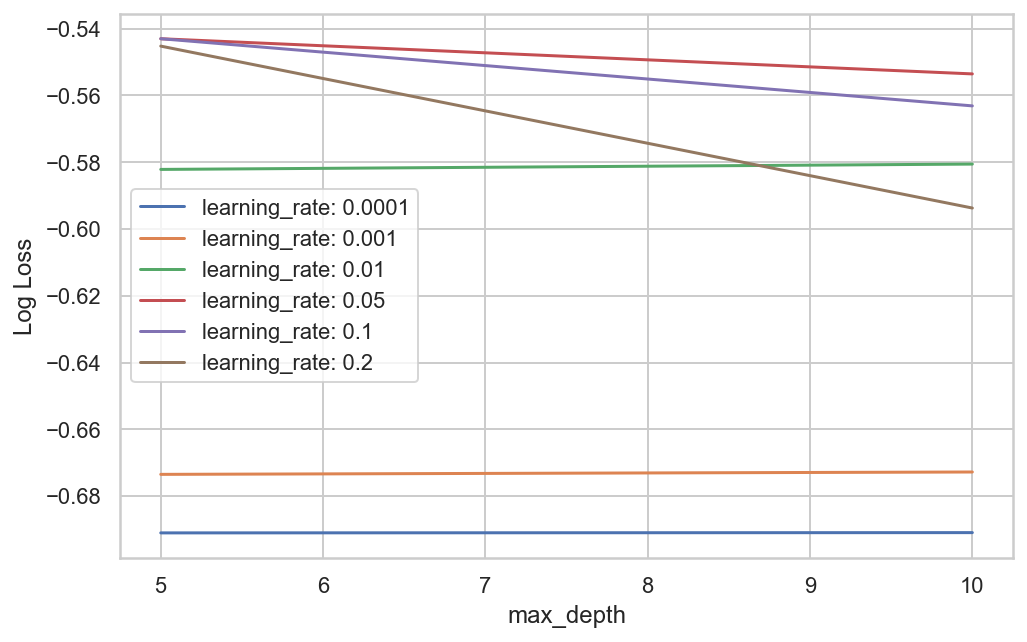

In [95]:
#plot results
plt.figure(figsize=(8,5))
scores = np.array(means).reshape(len(learning_rate), len(max_depth))
for i, value in enumerate(learning_rate):
    plt.plot(max_depth, scores[i], label='learning_rate: ' + str(value))
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth_vs_learning_rate.png')